<a href="https://colab.research.google.com/github/intheblueside/spotify-popularity/blob/main/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A: Assess / Model Evaluation

Comparing between models to get the best model using evaluation metrics, model interpretability and checking for model fairness

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# load models
model1 = joblib.load('neuralnetwork.pkl')
model2 = joblib.load('lightgbm.pkl')

# linear regression and the fam
model3 = joblib.load('linear_regression_model.pkl')
model4 = joblib.load('lasso_model.pkl')
model5 = joblib.load('ridge_model.pkl')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# load dataset
df = pd.read_csv('dataset_afterCleaning.csv')
df.head()

,track_id,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,...,-0.293978,1.067265,0.806275,-1.171010,0.0,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,...,-0.293735,-0.708863,-1.022838,-1.521623,0.0,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,...,-0.294031,-0.598287,-1.623016,-1.560524,0.0,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,...,-0.290263,-0.494622,-1.529110,1.983533,0.0,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,...,-0.294031,-0.833952,-1.431122,-0.094021,0.0,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


In [ ]:
df = df.drop(columns=['track_id', 'artists', 'time_signature'])

In [ ]:
# set target
X_test = df.drop(columns=['popularity'])
y_test = df['popularity'] # target

In [ ]:
# predict for the linear regressions
predict3 = model3.predict(X_test) # linear reg
predict4 = model4.predict(X_test) # lasso
predict5 = model5.predict(X_test) # ridge

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
mae3 = mean_absolute_error(y_test, predict3)
mse3 = mean_squared_error(y_test, predict3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, predict3)

mae4 = mean_absolute_error(y_test, predict4)
mse4 = mean_squared_error(y_test, predict4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test, predict4)

mae5 = mean_absolute_error(y_test, predict5)
mse5 = mean_squared_error(y_test, predict5)
rmse5 = np.sqrt(mse5)
r2_5 = r2_score(y_test, predict5)

print(f'Linear Regression Model     : MAE: {mae3}, MSE: {mse3}, RMSE: {rmse3}, R^2: {r2_3}')
print(f'Lasso Model                 : MAE: {mae4}, MSE: {mse4}, RMSE: {rmse4}, R^2: {r2_4}')
print(f'Ridge Model                 : MAE: {mae5}, MSE: {mse5}, RMSE: {rmse5}, R^2: {r2_5}')

Linear Regression Model     : MAE: 0.8079340601869747, MSE: 0.9629445976160852, RMSE: 0.9812974052834773, R^2: 0.037055402383914804
Lasso Model                 : MAE: 0.8137630822366178, MSE: 0.9689714625616866, RMSE: 0.9843634809163161, R^2: 0.031028537438313353
Ridge Model                 : MAE: 0.8079447052227069, MSE: 0.9629490382565303, RMSE: 0.9812996679182819, R^2: 0.03705096174346967


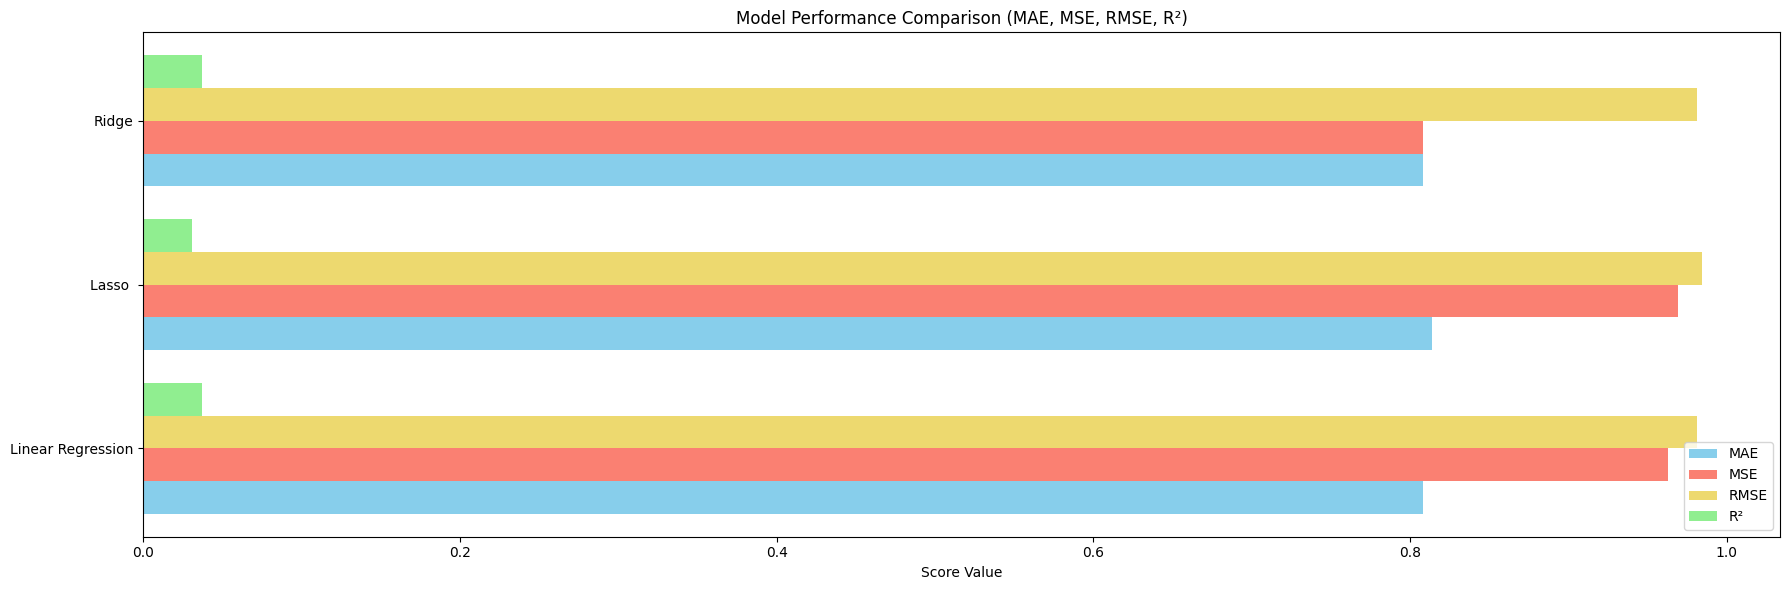

In [ ]:
# visualize model performance
f, ax = plt.subplots(1,1, figsize=(18,6))

models = ['Linear Regression', 'Lasso ', 'Ridge']

mae_values = [mae3, mae4, mae5]
mse_values = [mse3, mse4, mae5]
rmse_values = [rmse3, rmse4, rmse5]
r2_values = [r2_3, r2_4, r2_5]

bar_width = 0.20
y_pos = np.arange(len(models))  # Y-axis positions for the models

ax.barh(y_pos - 1.5 * bar_width, mae_values, bar_width, label='MAE', color='skyblue')
ax.barh(y_pos - 0.5 * bar_width, mse_values, bar_width, label='MSE', color='salmon')
ax.barh(y_pos + 0.5 * bar_width, rmse_values, bar_width, label='RMSE', color='#edd96f')
ax.barh(y_pos + 1.5 * bar_width, r2_values, bar_width, label='R²', color='lightgreen')

# Add labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.set_xlabel('Score Value')
ax.set_title('Model Performance Comparison (MAE, MSE, RMSE, R²)')
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

Linear Regression and Ridge Regression are tied for the best performance.
Since their metrics are almost identical, and Ridge Regression includes regularization to handle multicollinearity and prevent overfitting, Ridge Regression is a more robust choice

In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=a7860ce43402167f6335df322dd1edf9931f0d984c7c61e55925a23ffebafb29
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o

# start the H2O cluster
h2o.init()

# load model
model6 = h2o.load_model('/content/StackedEnsemble_AllModels_1_AutoML_1_20250110_182719')


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyftz0yql
  JVM stdout: /tmp/tmpyftz0yql/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyftz0yql/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_skn94q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# convert to h20 framework
X_test_h2o = h2o.H2OFrame(X_test)

# model prediction for auto ml
predict6 = model6.predict(X_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# convert predictions to a pandas DataFrame
predict6 = predict6.as_data_frame()

# actual values from y_test
y_test_values = y_test.values

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
predict1 = model1.predict(X_test) # neural netwrok
predict2 = model2.predict(X_test) # lightgbm

2589/2589 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


In [ ]:
# evaluation metrics comparison with neural network lightgbm automl and ridge regression

# neural network
mae1 = mean_absolute_error(y_test, predict1)
mse1 = mean_squared_error(y_test, predict1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, predict1)

# lightgbm
mae2 = mean_absolute_error(y_test, predict2)
mse2 = mean_squared_error(y_test, predict2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, predict2)

# ridge
mae5 = mean_absolute_error(y_test, predict5)
mse5 = mean_squared_error(y_test, predict5)
rmse5 = np.sqrt(mse5)
r2_5 = r2_score(y_test, predict5)

# h20 automl
mae6 = mean_absolute_error(y_test, predict6)
mse6 = mean_squared_error(y_test, predict6)
rmse6 = np.sqrt(mse6)
r2_6 = r2_score(y_test, predict6)

print(f'Model 1 Neural Network     : MAE: {mae1}, MSE: {mse1}, RMSE: {rmse1}, R^2: {r2_1}')
print(f'Model 2 LightGBM           : MAE: {mae2}, MSE: {mse2}, RMSE: {rmse2}, R^2: {r2_2}')
print(f'Model 3 Ridge Regression   : MAE: {mae5}, MSE: {mse5}, RMSE: {rmse5}, R^2: {r2_5}')
print(f'Model 4 H20 AutoML         : MAE: {mae6}, MSE: {mse6}, RMSE: {rmse6}, R^2: {r2_6}')

Model 1 Neural Network     : MAE: 0.661174088006511, MSE: 0.7140439509018721, RMSE: 0.845011213477, R^2: 0.2859560490981279
Model 2 LightGBM           : MAE: 0.5697815777570315, MSE: 0.5458176854409164, RMSE: 0.7387947519040159, R^2: 0.45418231455908364
Model 3 Ridge Regression   : MAE: 0.8079447052227069, MSE: 0.9629490382565303, RMSE: 0.9812996679182819, R^2: 0.03705096174346967
Model 4 H20 AutoML         : MAE: 0.44683816401440557, MSE: 0.3734913303014464, RMSE: 0.6111393706033399, R^2: 0.6265086696985536


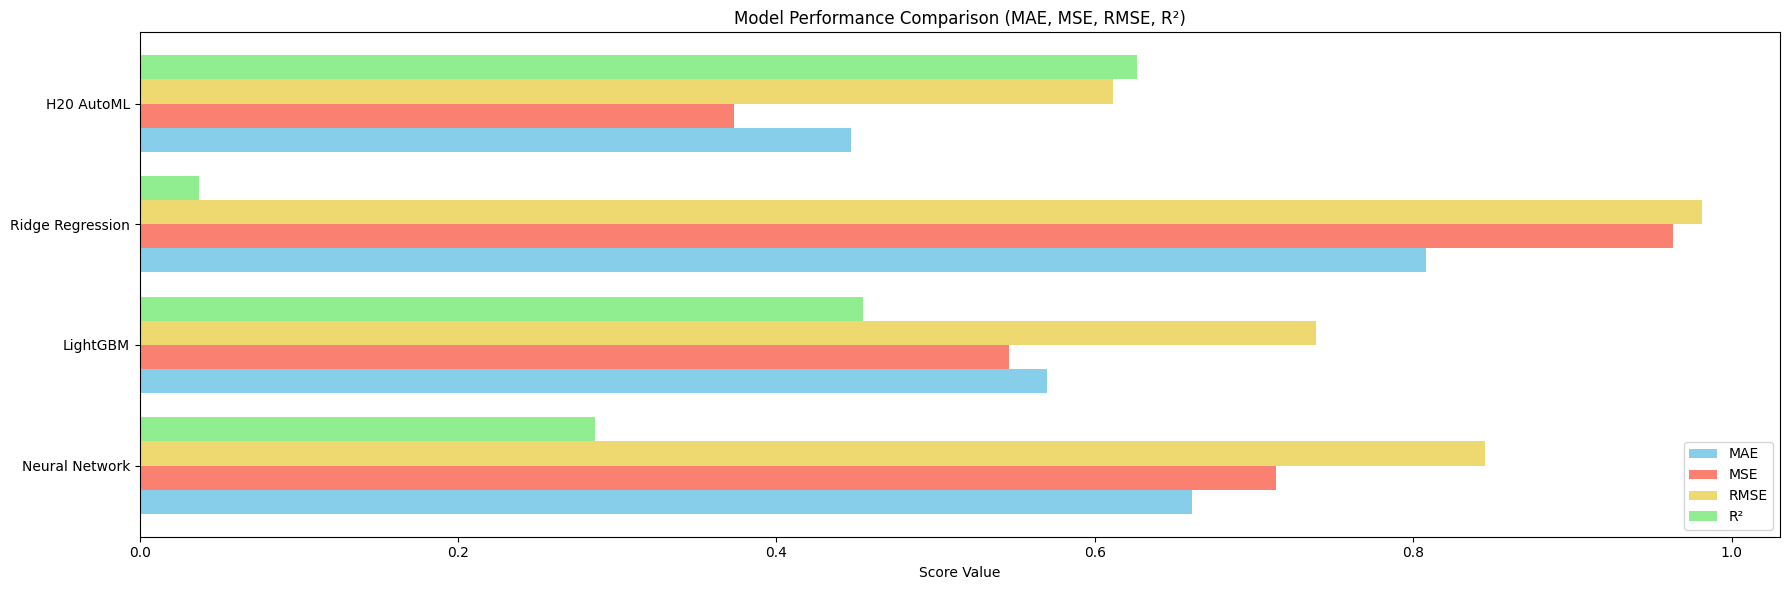

In [ ]:
# visualize model performance
f, ax = plt.subplots(1,1, figsize=(18,6))

models = ['Neural Network', 'LightGBM', 'Ridge Regression', 'H20 AutoML']

mae_values = [mae1, mae2, mae5, mae6]
mse_values = [mse1, mse2, mse5, mse6]
rmse_values = [rmse1, rmse2, rmse5, rmse6]
r2_values = [r2_1, r2_2, r2_5, r2_6]

bar_width = 0.20
y_pos = np.arange(len(models))  # Y-axis positions for the models

# Plot horizontal bars for each metric
ax.barh(y_pos - 1.5 * bar_width, mae_values, bar_width, label='MAE', color='skyblue')
ax.barh(y_pos - 0.5 * bar_width, mse_values, bar_width, label='MSE', color='salmon')
ax.barh(y_pos + 0.5 * bar_width, rmse_values, bar_width, label='RMSE', color='#edd96f')
ax.barh(y_pos + 1.5 * bar_width, r2_values, bar_width, label='R²', color='lightgreen')

# Add labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.set_xlabel('Score Value')
ax.set_title('Model Performance Comparison (MAE, MSE, RMSE, R²)')
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

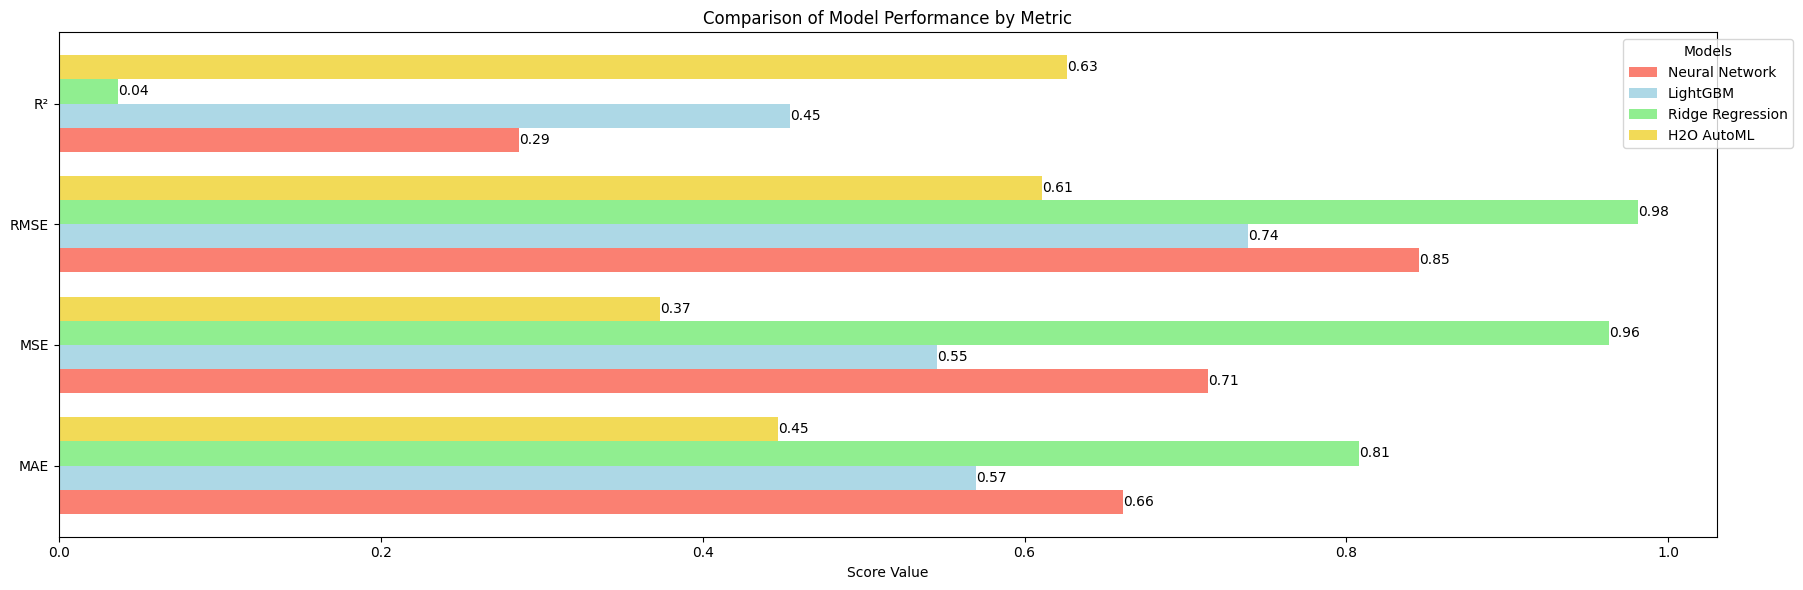

In [ ]:
# plot of metrics against each other
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
models = ['Neural Network', 'LightGBM', 'Ridge Regression', 'H2O AutoML']  # Models
scores = [
    [mae1, mae2, mae5, mae6],
    [mse1, mse2, mse5, mse6],
    [rmse1, rmse2, rmse5, rmse6],
    [r2_1, r2_2, r2_5, r2_6]
]
colors = ['salmon', 'lightblue', 'lightgreen', '#f2da57'] # colors for each bar

bar_width = 0.2
y_pos = np.arange(len(metrics))


plt.figure(figsize=(18, 6))

for i, model in enumerate(models):
    # Offset each cluster by the model's index
    plt.barh(y_pos + i * bar_width, [scores[metric_idx][i] for metric_idx in range(len(metrics))],
             bar_width, label=model, color=colors[i])

# labels and formatting
plt.yticks(y_pos + bar_width * (len(models) - 1) / 2, metrics)  # Center the ticks
plt.xlabel('Score Value')
plt.title('Comparison of Model Performance by Metric')
plt.legend(title='Models', loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Annotate bars with model names
for i, model in enumerate(models):
    for j, value in enumerate([scores[metric_idx][i] for metric_idx in range(len(metrics))]):
        plt.text(value, y_pos[j] + i * bar_width, f'{value:.2f}', va='center', ha='left', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# display all data in a table format
data = {
    "Model": ['Neural Network', 'LightGBM', 'Linear Regression', 'Lasso', 'Ridge', 'H2O AutoML'],
    "MAE": [mae1, mae2, mae3, mae4, mae5, mae6],
    "MSE": [mse1, mse2, mse3, mse4, mse5, mse6],
    "RMSE": [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6],
    "R²": [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6],
}

df = pd.DataFrame(data)

# display table
df.style.format({"MAE": "{:.3f}", "MSE": "{:.3f}", "RMSE": "{:.3f}", "R²": "{:.3f}"})

,Model,MAE,MSE,RMSE,R²
0,Neural Network,0.661,0.714,0.845,0.286
1,LightGBM,0.570,0.546,0.739,0.454
2,Linear Regression,0.808,0.963,0.981,0.037
3,Lasso,0.814,0.969,0.984,0.031
4,Ridge,0.808,0.963,0.981,0.037
5,H2O AutoML,0.447,0.373,0.611,0.627


Based on the results, H20 AutoML has the best performance with the lowest MAE (0.447) and MSE (0.373) and Highest R2 score (0.627), indicating the best fit. It outperforms all other models, demonstrating the power of automated machine learning.

# SHAP

Using SHAP to interpret the H2O AutoML

In [ ]:
pip install shap

In [ ]:
import shap
from h2o.automl import H2OAutoML

In [ ]:
shap.initjs()

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 24 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_skn94q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.149 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# what model in the h2o automl giving best results
print(model6._model_json['algo'])

stackedensemble


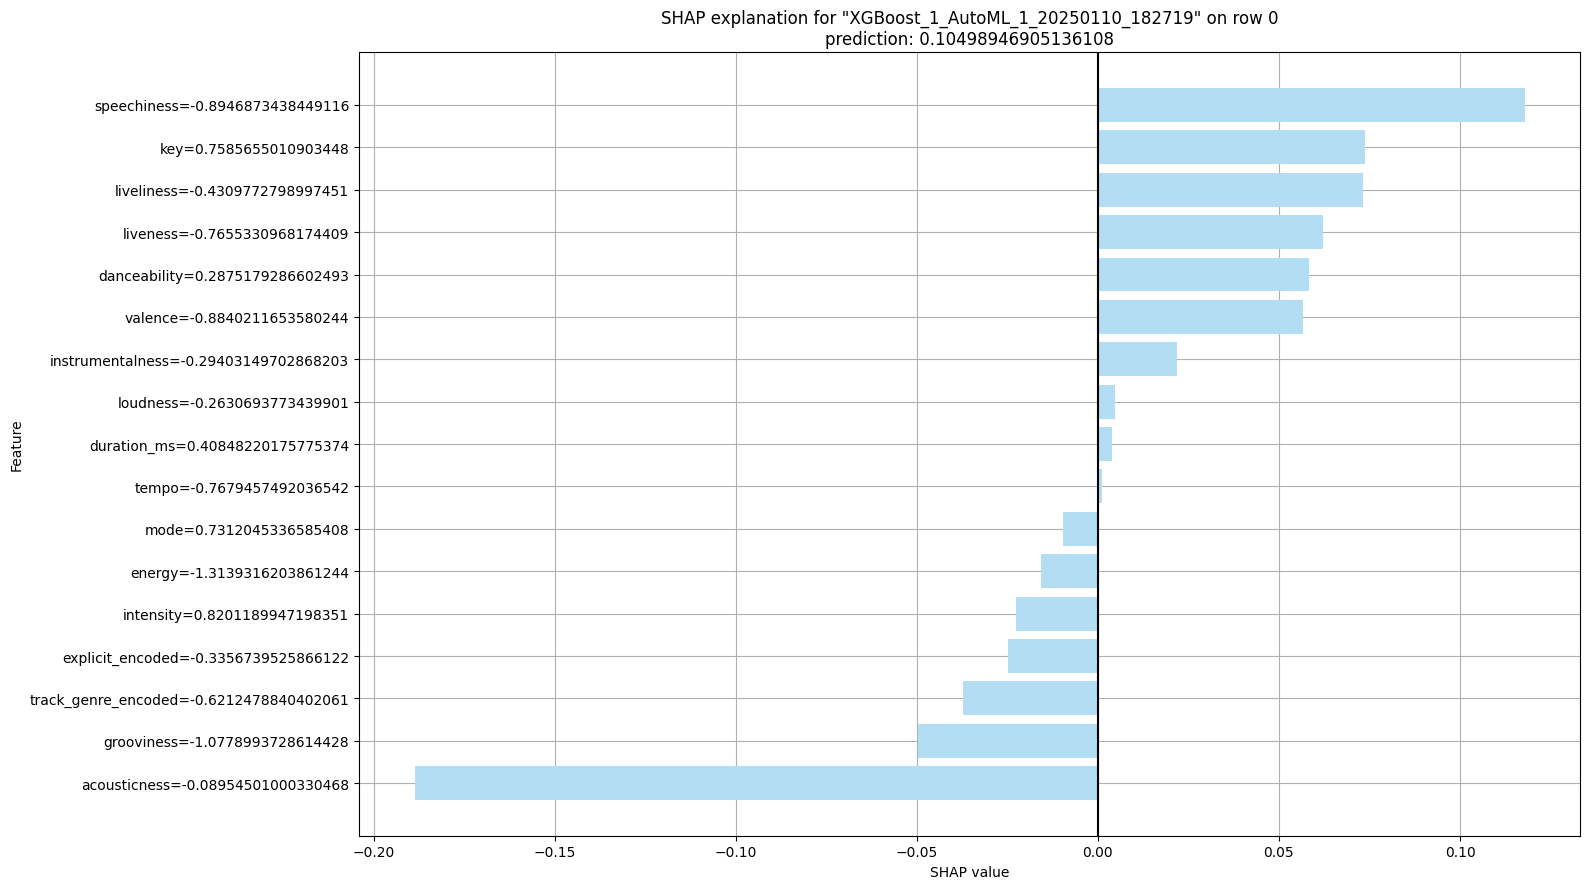

In [ ]:
# extract the base models of the StackedEnsemble
base_models = model6.base_models

# base model to explain // the first one
base_model = h2o.get_model(base_models[0])

# SHAP explanation for the base model
shap_explain_row_plot = base_model.shap_explain_row_plot(X_test_h2o, row_index=0, background_frame=X_test_h2o)


Since StackedEnsemble is not compatible with SHAP, look for other models in the h2o that have good performance

In [ ]:
y_test_df = pd.DataFrame(y_test)

# change to an H2OFrame
y_test_h2o = h2o.H2OFrame(y_test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# combine the features and the target into a single dataset
full_test_data = X_test_h2o.cbind(y_test_h2o)

In [ ]:
# list to hold model performance results for easy comparison
model_performance_results = []

# loop through all the base models
for base_model_id in base_models:
    base_model = h2o.get_model(base_model_id)

    if base_model:
        # get the model performance on the test dataset
        performance = base_model.model_performance(full_test_data)

        # extract relevant metrics
        mse = performance.mse()
        rmse = performance.rmse()
        mae = performance.mae()
        r2 = performance.r2()

        model_performance_results.append({
            "Model ID": base_model_id,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R^2": r2
        })


performance_df = pd.DataFrame(model_performance_results)
print(performance_df)

                             Model ID       MSE      RMSE       MAE       R^2
0  XGBoost_1_AutoML_1_20250110_182719  0.352983  0.594123  0.426693  0.647017
1      GBM_1_AutoML_1_20250110_182719  0.531861  0.729288  0.558320  0.468139
2  XGBoost_2_AutoML_1_20250110_182719  0.704637  0.839427  0.662000  0.295363
3      GBM_4_AutoML_1_20250110_182719  0.782560  0.884624  0.714175  0.217440
4      GBM_3_AutoML_1_20250110_182719  0.854036  0.924141  0.752338  0.145964
5      GBM_2_AutoML_1_20250110_182719  0.851244  0.922629  0.746837  0.148756
6      DRF_1_AutoML_1_20250110_182719  0.509327  0.713672  0.484307  0.490673
7      GLM_1_AutoML_1_20250110_182719  0.962949  0.981299  0.807795  0.037051


In [ ]:
# select the model with the lowest RMSE
best_model = performance_df.loc[performance_df['RMSE'].idxmin()]

print(f"The best model based on RMSE is: {best_model['Model ID']}")

The best model based on RMSE is: XGBoost_1_AutoML_1_20250110_182719


In [ ]:
# evaluate the stacked ensemble model on the test data
stacked_model = h2o.get_model('StackedEnsemble_AllModels_1_AutoML_1_20250110_182719')
stacked_performance = stacked_model.model_performance(full_test_data)

# extract metrics
stacked_mse = stacked_performance.mse()
stacked_rmse = stacked_performance.rmse()
stacked_mae = stacked_performance.mae()
stacked_r2 = stacked_performance.r2()

print("Performance of the Stacked Ensemble Model:")
print(f"MSE: {stacked_mse}")
print(f"RMSE: {stacked_rmse}")
print(f"MAE: {stacked_mae}")
print(f"R^2: {stacked_r2}")

Performance of the Stacked Ensemble Model:
MSE: 0.3734913333164693
RMSE: 0.6111393730700627
MAE: 0.4468381654910005
R^2: 0.6265086695310949


XGBoost performs slightly better than the Stacked Ensemble Model:
- MSE and RMSE are lower for XGBoost, indicating better prediction accuracy.
- R^2 is higher for XGBoost, suggesting that the model explains more of the variance in the data.
- MAE is also lower for XGBoost, indicating that the average error is smaller.

XGBoost_1_AutoML_1_ performs the best

# SHAP on XGBoost_1_AutoML_1_

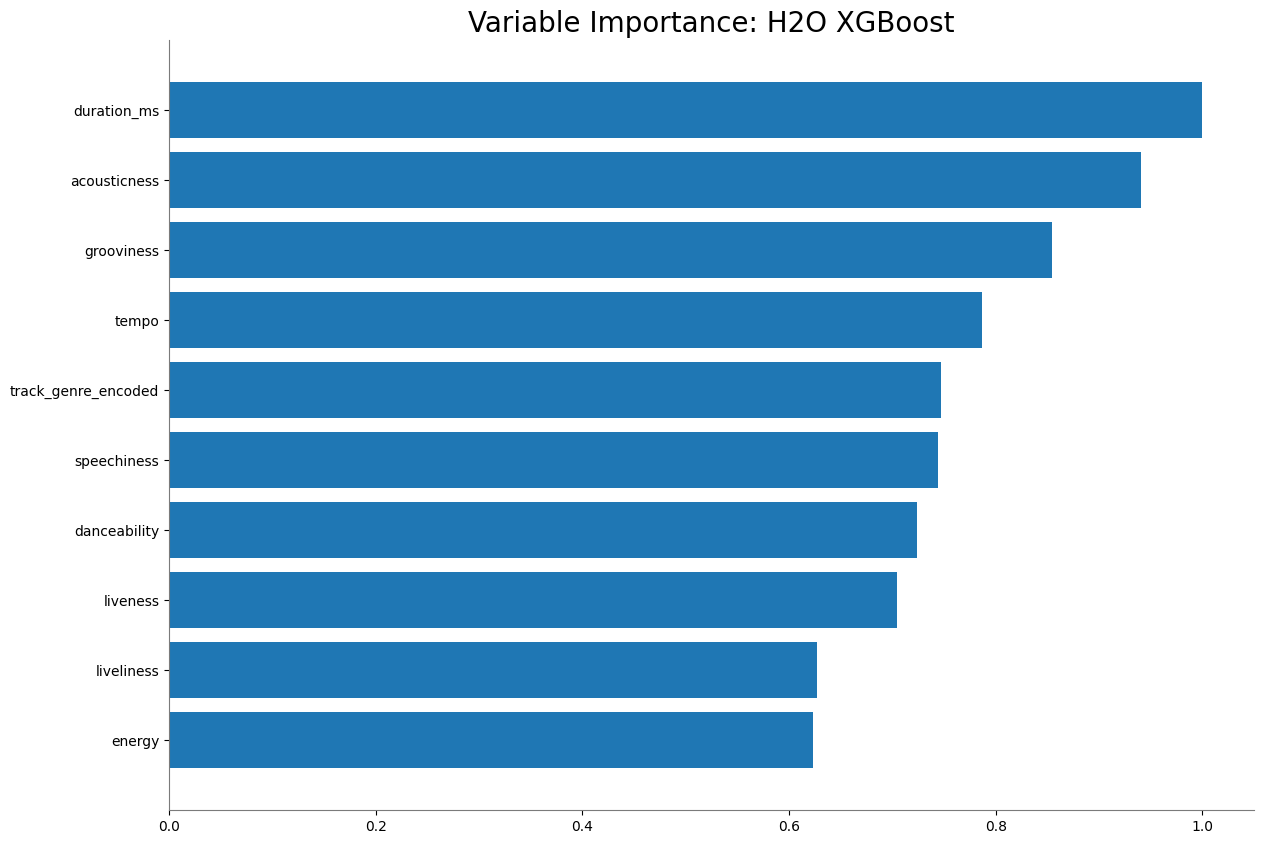

<Figure size 640x480 with 0 Axes>

In [ ]:
# base model is the XGBoost_1 model
# variable importance plot
ra_plot = base_model.varimp_plot()

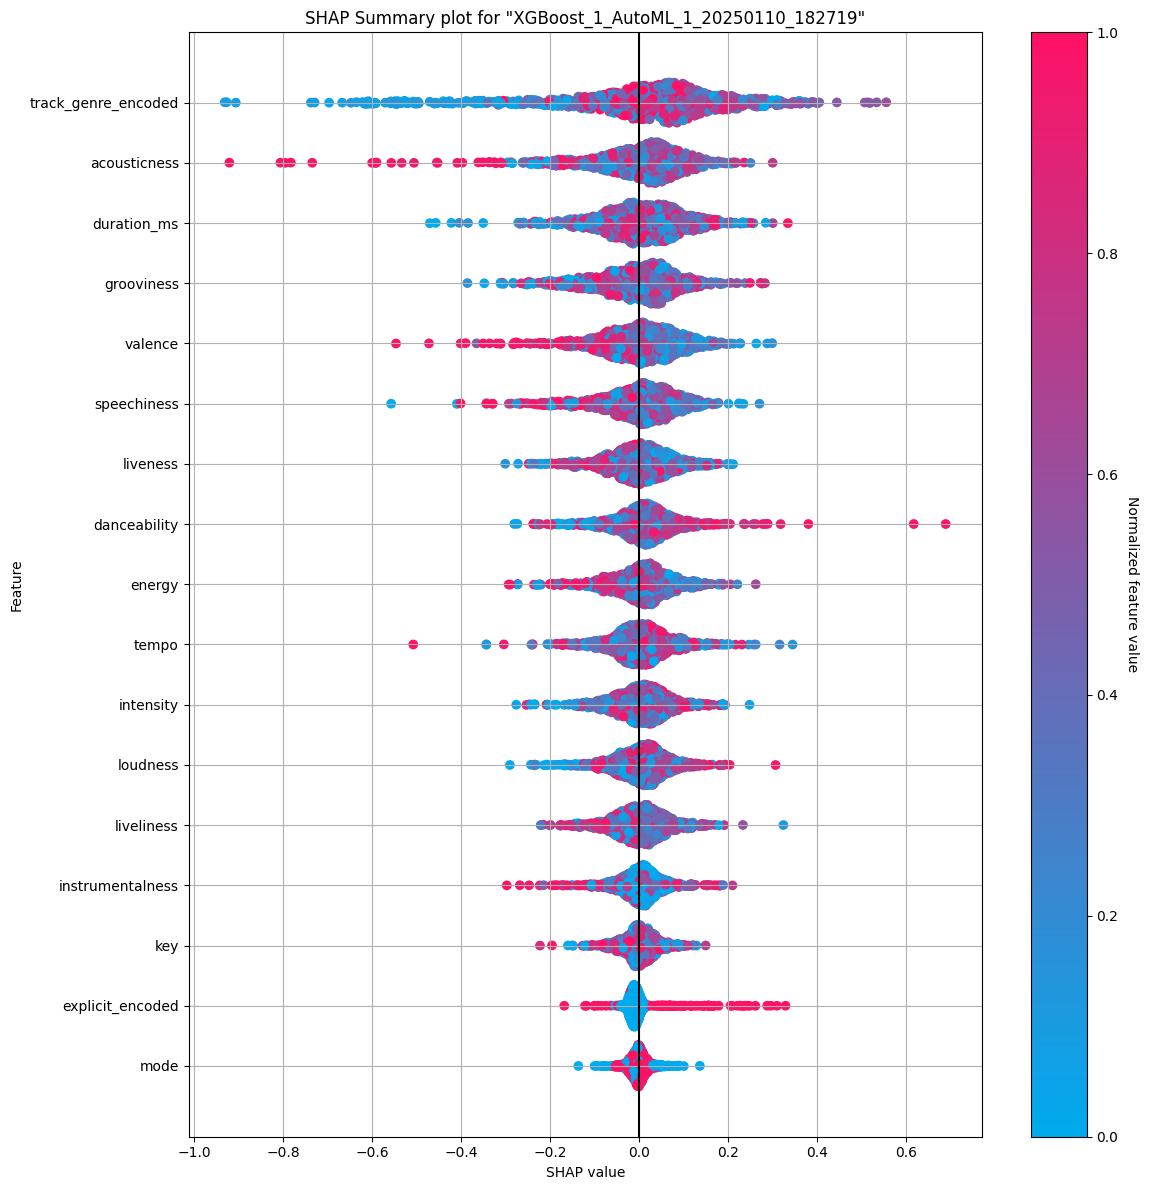

In [ ]:
shap_plot = base_model.shap_summary_plot(X_test_h2o)

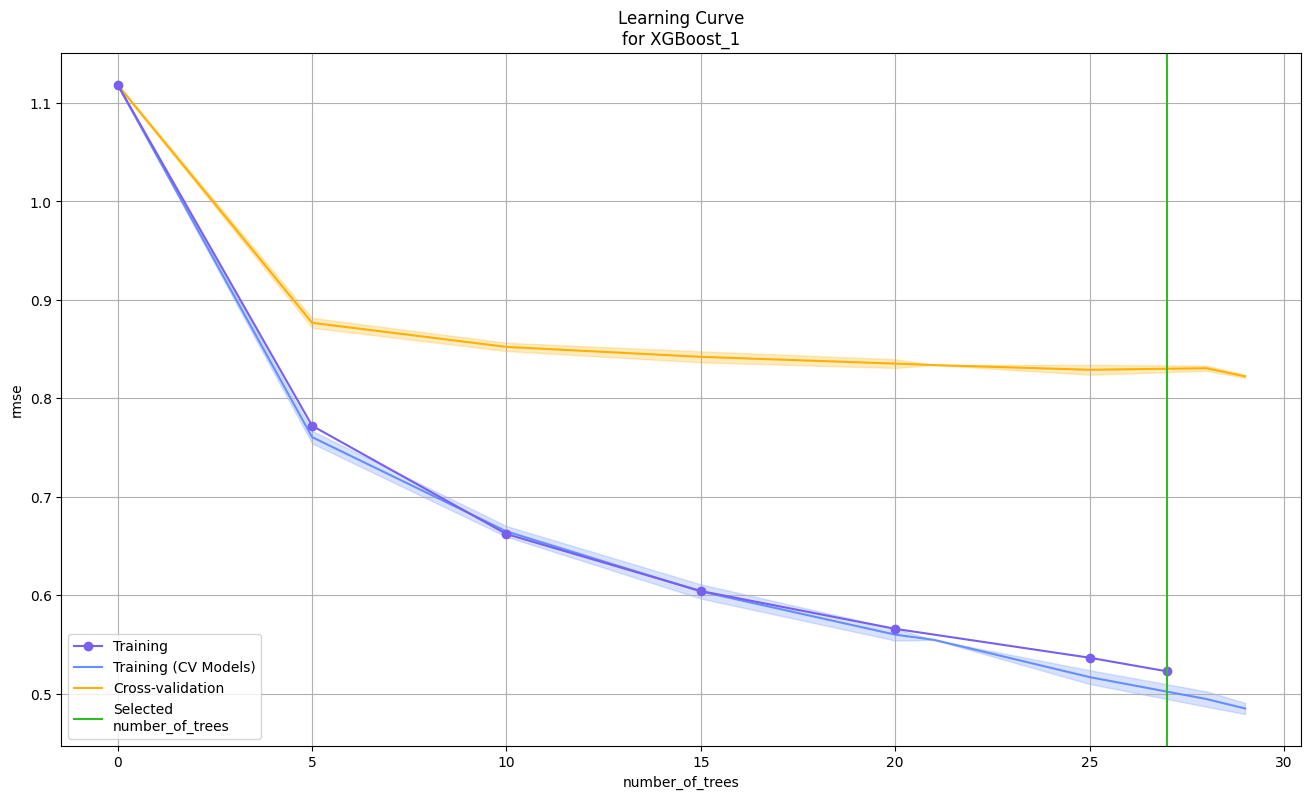

In [ ]:
learning_curve_plot = base_model.learning_curve_plot()

In [ ]:
data_h2o = h2o.import_file("dataset_afterCleaning.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Drop columns from the full H2O dataset before splitting
columns_to_drop = ['track_id', 'artists', 'time_signature']
data_h2o = data_h2o.drop(columns_to_drop)

In [ ]:
# Split the data into train and test
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Check columns in train and test datasets after splitting
print("Columns in train:", train.columns)
print("Columns in test:", test.columns)

Columns in train: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit_encoded', 'track_genre_encoded', 'intensity', 'liveliness', 'grooviness']
Columns in test: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit_encoded', 'track_genre_encoded', 'intensity', 'liveliness', 'grooviness']


In [ ]:
# target and predictors
target = 'popularity'
predictors = [col for col in data_h2o.columns if col != target]

X_train= train[predictors]
y_train = train[target]

X_test= test[predictors]
y_test = test[target]

# features and target for both train and test datasets
X_train_h2o = train[predictors]
y_train_h2o = train[target]

X_test_h2o = test[predictors]
y_test_h2o = test[target]

In [ ]:
explainer = shap.Explainer(base_model, X_train)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20250110_182719


Model Summary: 
    number_of_trees
--  -----------------
    27

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.2731773140797496
RMSE: 0.5226636720490048
MAE: 0.3796193851336168
RMSLE: NaN
Mean Residual Deviance: 0.2731773140797496

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.6855704991211888
RMSE: 0.8279918472552666
MAE: 0.6234953871480307
RMSLE: NaN
Mean Residual Deviance: 0.6855704991211888

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     0.623495  0.00699468  0.624095      0.625894      0.619585      0.614627      0.633275
mean_residual_deviance  0.68557   0.00942293  0.685558      0.694355      0.679023      0.673673      0.695243
mse                     0.68557   0.00942293  0.685558      0.694355      0.679023      0.673673      0.695243
r2                      0.314739  0.0106469   0.310001      0.30516       0.324705      0.327649      0.306182
residual_deviance       0.68557   0.00942293  0.685558      0.694355      0.679023      0.673673      0.695243
rmse                    0.827976  0.00569263  0.827984      0.83328       0.824028      0.820776      0.833812
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2025-01-10 18:28:31  1 min 11.496 sec  0                  1.11834          0.901077        1.25068
    2025-01-10 18:28:33  1 min 13.102 sec  5                  0.772166         0.609649        0.596241
    2025-01-10 18:28:34  1 min 14.962 sec  10                 0.662175         0.506001        0.438476
    2025-01-10 18:28:36  1 min 16.564 sec  15                 0.60428          0.451722        0.365154
    2025-01-10 18:28:37  1 min 17.919 sec  20                 0.56588          0.417756        0.32022
    2025-01-10 18:28:39  1 min 19.613 sec  25                 0.536535         0.391867        0.287869
    2025-01-10 18:28:40  1 min 20.393 sec  27                 0.522664         0.379619        0.273177

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
duration_ms          7697.97                1                    0.0956476
acousticness         7237.51                0.940184             0.0899263
grooviness           6575.84                0.85423              0.0817051
tempo                6054.42                0.786495             0.0752263
track_genre_encoded  5751.73                0.747174             0.0714654
speechiness          5730.38                0.744402             0.0712002
danceability         5569.23                0.723467             0.0691978
liveness             5422.61                0.70442              0.0673761
liveliness           4829.25                0.627341             0.0600036
energy               4796.75                0.623119             0.0595998
valence              4766.17                0.619147             0.0592199
loudness             4546.91                0.590663             0.0564955
intensity            4382.45                0.5693               0.0544521
instrumentalness     3801.44                0.493823             0.047233
key                  2507.9                 0.325787             0.0311608
mode                 458.469                0.0595571            0.00569649
explicit_encoded     353.632                0.0459383            0.00439389

# Fairness check using Fairlearn

In [ ]:
pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
# import
from fairlearn.metrics import MetricFrame
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
y_true = y_test['popularity']
y_pred = base_model.predict(X_test_h2o).as_data_frame()['predict'].values # predict

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Get predictions from the mojo_model
y_pred = base_model.predict(X_test_h2o).as_data_frame()['predict']

# Ensure y_test is a pandas Series and correctly aligned
y_test_values = y_test.as_data_frame()['popularity'].values  # Convert to numpy array

# Extract sensitive attribute from X_test_h2o (ensure this is also a numpy array)
sensitive_attribute = X_test_h2o['grooviness'].as_data_frame()['grooviness'].values  # Convert to numpy array

sensitive_attribute_tempo = X_test_h2o['tempo'].as_data_frame()['tempo'].values  # Convert to numpy array

# Define fairness metrics (mean absolute error, mean squared error, etc.)
fairness_metrics = {
    'mean_absolute_error': mean_absolute_error,
    'mean_squared_error': mean_squared_error,
    'r2_score': r2_score
}

# Create MetricFrame for fairness evaluation
metric_frame = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test_values,  # Ensure this is a numpy array
    y_pred=y_pred,
    sensitive_features=sensitive_attribute
)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined wi

In [ ]:
print(metric_frame.by_group)

                     mean_absolute_error  mean_squared_error  r2_score
sensitive_feature_0                                                   
-3.972329                       0.220121            0.048453       NaN
-3.972329                       0.080903            0.006563  0.187436
-3.968349                       0.154874            0.023986       NaN
-3.856671                       1.123539            1.262340       NaN
-3.547567                       0.337260            0.113744       NaN
...                                  ...                 ...       ...
 2.093818                       0.308352            0.095081       NaN
 2.126990                       0.477283            0.228337  0.000000
 2.138047                       0.292731            0.085692       NaN
 2.169376                       0.249860            0.062430       NaN
 2.213605                       0.130651            0.017070       NaN

[13058 rows x 3 columns]


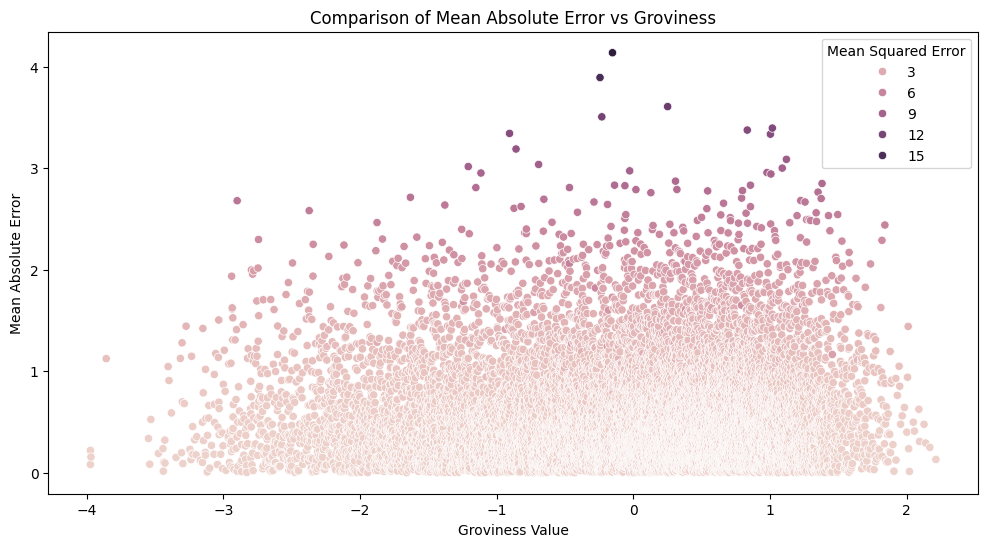

In [ ]:
metrics_df = metric_frame.by_group.reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=metrics_df, x='sensitive_feature_0', y='mean_absolute_error', hue='mean_squared_error')
plt.title("Comparison of Mean Absolute Error vs Groviness")
plt.xlabel("Groviness Value")
plt.ylabel("Mean Absolute Error")
plt.legend(title="Mean Squared Error")
plt.show()